In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr


### Explore unmodifed dataset

In [59]:
train_full = pd.read_csv("SubCh1_TrainingData.csv")
test_full = pd.read_csv("SubCh1_TestData.csv")
print(train_full.shape)
train_full.head()

(272, 5546)


,Sample_Name,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
0,isolate_01.24HR.DHA.BRep1,isolate_01,24HR,DHA,BRep1,0.008286,-0.959492,0.206468,-0.443936,0.453030,...,-0.540993,-3.674097,-1.652979,-2.255490,-4.554757,-0.381422,-1.415857,-4.121011,-2.486528,2.177
1,isolate_01.24HR.DHA.BRep2,isolate_01,24HR,DHA,BRep2,-0.872028,-1.968558,-2.308563,-1.186611,0.508575,...,0.450649,-4.464408,-0.977954,-2.012559,-4.538550,-2.333890,-2.342496,-4.774197,-1.794568,2.177
2,isolate_01.24HR.UT.BRep1,isolate_01,24HR,UT,BRep1,0.039480,-1.291371,-0.946661,-0.538092,-1.778501,...,1.411557,-5.500522,-1.764229,-1.947208,-5.331037,-0.814417,-2.141285,-3.922684,-2.495169,2.177
3,isolate_01.24HR.UT.BRep2,isolate_01,24HR,UT,BRep2,0.125177,-1.462758,-1.888105,-0.828352,-1.410803,...,-0.659519,-5.011207,-0.559471,-2.266763,-5.289318,-2.949869,-2.206432,-4.324299,-1.735312,2.177
4,isolate_01.6HR.DHA.BRep1,isolate_01,6HR,DHA,BRep1,1.354956,-2.139128,-0.541696,-1.481881,-0.735798,...,-1.687048,-4.773306,-0.048847,-2.023727,-4.398358,-3.080500,-0.566545,-4.798190,-0.821690,2.177


In [61]:
# explore the values: number of isolates, treatement times, treatment types, and reps
columns = ['Isolate', 'Timepoint', 'Treatment', 'BioRep']
for i in train_full[columns]:
    print(train_full[i].unique())    

['isolate_01' 'isolate_02' 'isolate_03' 'isolate_04' 'isolate_05'
 'isolate_06' 'isolate_07' 'isolate_08' 'isolate_09' 'isolate_10'
 'isolate_11' 'isolate_12' 'isolate_13' 'isolate_14' 'isolate_15'
 'isolate_16' 'isolate_17' 'isolate_18' 'isolate_19' 'isolate_20'
 'isolate_21' 'isolate_22' 'isolate_23' 'isolate_24' 'isolate_25'
 'isolate_26' 'isolate_27' 'isolate_28' 'isolate_29' 'isolate_30']
['24HR' '6HR']
['DHA' 'UT']
['BRep1' 'BRep2' 'BRep3' 'BRep4' 'BRep5' 'BRep6' 'BRep7' 'BRep8']


***Dataset contains: 30 isolates, 2 timepoints, 2 treatement types (DHA and untreated), and some samples have 8 bioreps***

### Explore target distribution and variable relationship to target

In [62]:
#convert values to int type, drop unnecessary columns
train_full['Timepoint'] = [1 if i == '24HR' else 0 for i in train_full['Timepoint']]
train_full['Treatment'] = [1 if i == 'DHA' else 0 for i in train_full['Treatment']]
train_full['BioRep'] = [int(i[-1]) for i in train_full['BioRep']]
train_full['Isolate'] = [int(i[-2:]) for i in train_full['Isolate']]
train_full = train_full.drop(['Sample_Name'], axis = 1)

y = train_full[['DHA_IC50']]
print(y.shape)
print(train_full.shape)

train_full.head()

(272, 1)
(272, 5545)


,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,MAL10.1139073.1139243....kr,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
0,1,1,1,1,0.008286,-0.959492,0.206468,-0.443936,0.453030,0.291222,...,-0.540993,-3.674097,-1.652979,-2.255490,-4.554757,-0.381422,-1.415857,-4.121011,-2.486528,2.177
1,1,1,1,2,-0.872028,-1.968558,-2.308563,-1.186611,0.508575,-0.368476,...,0.450649,-4.464408,-0.977954,-2.012559,-4.538550,-2.333890,-2.342496,-4.774197,-1.794568,2.177
2,1,1,0,1,0.039480,-1.291371,-0.946661,-0.538092,-1.778501,1.037573,...,1.411557,-5.500522,-1.764229,-1.947208,-5.331037,-0.814417,-2.141285,-3.922684,-2.495169,2.177
3,1,1,0,2,0.125177,-1.462758,-1.888105,-0.828352,-1.410803,0.926191,...,-0.659519,-5.011207,-0.559471,-2.266763,-5.289318,-2.949869,-2.206432,-4.324299,-1.735312,2.177
4,1,0,1,1,1.354956,-2.139128,-0.541696,-1.481881,-0.735798,-0.129961,...,-1.687048,-4.773306,-0.048847,-2.023727,-4.398358,-3.080500,-0.566545,-4.798190,-0.821690,2.177


In [63]:
train_full['DHA_IC50'].describe()

count    272.000000
mean       1.570315
std        0.534407
min        0.693300
25%        1.348000
50%        1.582000
75%        1.820000
max        3.460000
Name: DHA_IC50, dtype: float64

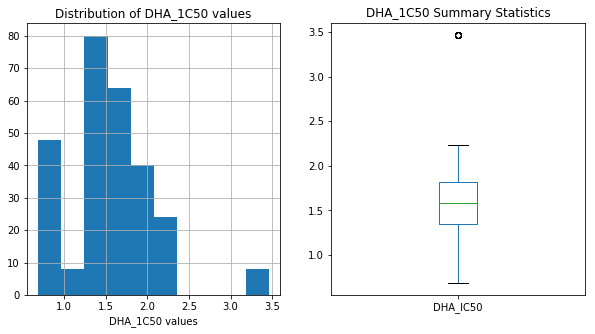

In [70]:
#what is the distribution of target values?
plt.figure(figsize = (10, 5))

ax0 = plt.subplot(1, 2, 1)
train_full['DHA_IC50'].hist(ax = ax0)
ax0.set_title("Distribution of DHA_1C50 values")
ax0.set_xlabel("DHA_1C50 values")

ax1 = plt.subplot(1, 2, 2)
train_full['DHA_IC50'].plot(kind = 'box', ax = ax1)
ax1.set_title("DHA_1C50 Summary Statistics");

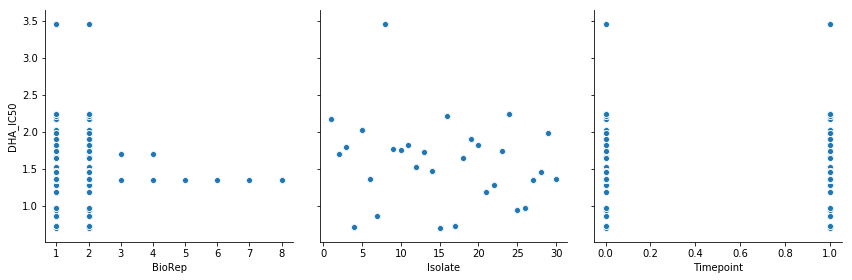

In [105]:
#relationship to target
sns.pairplot(train_full, x_vars = ['BioRep', 'Isolate', 'Timepoint'], 
             y_vars = ['DHA_IC50'], height=4, #aspect=6/5
            );

(<matplotlib.axes._subplots.AxesSubplot at 0x1a2b0b5898>,)

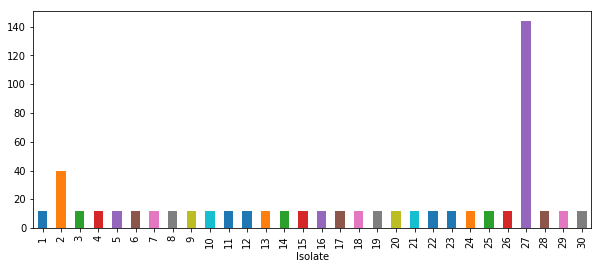

In [81]:
#which isolates have more than 2 bioreps? (aka more than 8 samples per isolate)
train_full.groupby('Isolate').BioRep.sum().plot(kind = 'bar', figsize = (10, 4)),

In [106]:
#how many extra reps are there compared to the total?

# isolates = 30
# samples_per_isolate = 8        #(6HR vs. 24HR, DHA vs. UT) X 2 bioreps each
# total_samples = 272
print("extra reps:", (272 - (30*8)))
print("% of total", round(32 / 272, 2))

extra reps: 32
% of total 0.12


In [100]:
#what are the DHA_IC50 values for the isolates with extra reps?
mask = (train_full['Isolate'] ==2) | (train_full['Isolate'] ==27)
train_full[mask]['DHA_IC50'].unique()

array([1.697, 1.348])

#### Target variable:
- IQR is between 1.348 - 1.82, min = 0.69, outlier = 3.46
- The majority of isolates have 2 bioreps, except for:
    - Isolate_2 has 4 reps, and Isolate_27 has 8 reps
    - Both are within the IQR (isolate_2 is equal to the first quartile)
- If for some reason we decided to drop the extra reps in isolate_2 and isolate_27, we would be dropping 12% of the total dataset 
    

## Next Section

In [107]:
train_full.corr()['DHA_IC50'].sort_values().head()

Isolate           -0.218144
PF3D7_0108200     -0.152791
PF3D7_0201600     -0.138929
PF3D7_0832200.1   -0.134475
PF3D7_0201500     -0.130164
Name: DHA_IC50, dtype: float64

In [109]:
train_full.corr()['DHA_IC50'].sort_values(ascending = False).head()

DHA_IC50                      1.000000
MAL13.2801236.2801354...gk    0.135570
PF3D7_0521600                 0.132004
PF3D7_0523200                 0.129189
PF3D7_0421200                 0.118192
Name: DHA_IC50, dtype: float64

In [ ]:
#### Spearman's correlation coefficient
# - measure of monotonic relationship
# - can be used for ordinal variables, less sensitive to outliers
# - score of 0 = no monotonic relationship

# calculate spearman's correlation

# https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/ 
# https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/
# https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials

# corr, _ = spearmanr(pred, y_test)
# print('Spearmans correlation: %.3f' % corr)
# spearmanr(pred, y_test)[0]